# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Moh. Faried Al Farizi
- **Email:** fariedfarizi24@gmail.com
- **ID Dicoding:** moh_faried_al_farizi

## Menentukan Pertanyaan Bisnis

1. Bagaimana performa penjualan produk dalam hal pendapatan di berbagai kategori produk? (Tujuannya adalah untuk melihat kategori produk mana yang paling menghasilkan pendapatan dan membantu dalam pengambilan keputusan mengenai alokasi sumber daya untuk produk)
2. Bagaimana hubungan antara review score dengan waktu pengiriman pesanan? Apakah ada keterkaitan antara ulasan yang lebih rendah dengan keterlambatan pengiriman? (Tujuannya adalah untuk mengevaluasi dampak waktu pengiriman terhadap kepuasan pelanggan)

## Import Semua Packages/Library yang Digunakan

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import datetime
from datetime import datetime


## Data Wrangling

### Gathering Data

In [4]:

# Load dataset
order_items_df = pd.read_csv('data/order_items_dataset.csv')
customers_df = pd.read_csv('data/customers_dataset.csv')
orders_df = pd.read_csv('data/orders_dataset.csv')
products_df = pd.read_csv('data/products_dataset.csv')

# Display the first few rows of each dataset to understand their structure
print("Order Items Dataset:")
display(order_items_df.head())

print("\nOrders Dataset:")
display(orders_df.head())


Order Items Dataset:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Orders Dataset:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Melihat struktur dataset akan membantu kita memahami kolom yang ada, tipe data, dan apakah ada data yang perlu disesuaikan.
- Dalam order_items_dataset, kita akan melihat kolom order_id, price, dan freight_value yang relevan untuk analisis penjualan.
- Dalam orders_dataset, kita akan fokus pada order_status, order_purchase_timestamp, order_delivered_customer_date, dll., untuk analisis waktu pengiriman dan status pesanan.

### Assessing Data

In [5]:
# Assessing the data

# Assessing the order items dataset
print("Order Items Dataset Info:")
order_items_df.info()

print("\nMissing Values in Order Items Dataset:")
print(order_items_df.isnull().sum())

# Assessing the orders dataset
print("\nOrders Dataset Info:")
orders_df.info()

print("\nMissing Values in Orders Dataset:")
print(orders_df.isnull().sum())


Order Items Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Missing Values in Order Items Dataset:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Orders Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (tot

**Insight:**
- Kita akan mencari nilai NaN dan mengidentifikasi kolom yang paling banyak kehilangan data.
- order_purchase_timestamp dan order_delivered_customer_date mungkin mengandung beberapa nilai NaN jika pesanan tidak diselesaikan. Ini perlu dipertimbangkan saat melakukan analisis.

### Cleaning Data

In [6]:

# Convert to datetime format 
order_items_df_clean = order_items_df.copy()
order_items_df_clean['shipping_limit_date'] = pd.to_datetime(order_items_df_clean['shipping_limit_date'])

# Cleaning the orders dataset
orders_df_clean = orders_df.copy()

# Fill in missing 'order_delivered_customer_date' with NaT for orders that are not yet delivered
orders_df_clean['order_delivered_customer_date'] = pd.to_datetime(orders_df_clean['order_delivered_customer_date'], errors='coerce')
orders_df_clean['order_delivered_carrier_date'] = pd.to_datetime(orders_df_clean['order_delivered_carrier_date'], errors='coerce')
orders_with_customers['order_purchase_timestamp'] = pd.to_datetime(orders_with_customers['order_purchase_timestamp'])

# Drop any rows with missing crucial data like 'order_id' or 'customer_id' if necessary
orders_df_clean = orders_df_clean.dropna(subset=['order_id', 'customer_id'])

# Remove duplicate entries in both datasets if they exist
order_items_df_clean = order_items_df_clean.drop_duplicates()
orders_df_clean = orders_df_clean.drop_duplicates()

# Verify the cleaned data
print("\nCleaned Order Items Dataset Info:")
order_items_df_clean.info()

print("\nCleaned Orders Dataset Info:")
orders_df_clean.info()



Cleaned Order Items Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.9+ MB

Cleaned Orders Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         -----------

**Insight:**
- shipping_limit_date telah diubah menjadi tipe datetime, sehingga dapat digunakan untuk analisis yang melibatkan waktu.
- Missing values di order_delivered_customer_date dan order_delivered_carrier_date diisi dengan NaT untuk menjaga konsistensi tipe data dan memudahkan analisis mendalam pada pesanan yang tidak terkirim.
- Tidak ada lagi missing values pada kolom order_id dan customer_id setelah dihapus, memastikan data yang kita miliki lebih bersih dan siap untuk analisis.

## Exploratory Data Analysis (EDA)

### Explore ...


Top 10 Product Categories by Revenue:


,product_category_name,price
11,beleza_saude,1258681.34
66,relogios_presentes,1205005.68
13,cama_mesa_banho,1036988.68
32,esporte_lazer,988048.97
44,informatica_acessorios,911954.32
54,moveis_decoracao,729762.49
26,cool_stuff,635290.85
72,utilidades_domesticas,632248.66
8,automotivo,592720.11
40,ferramentas_jardim,485256.46


C:\Users\hp\AppData\Local\Temp\ipykernel_26216\3903126542.py:19: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(revenue_by_category['product_category_name'][:10], revenue_by_category['price'][:10])


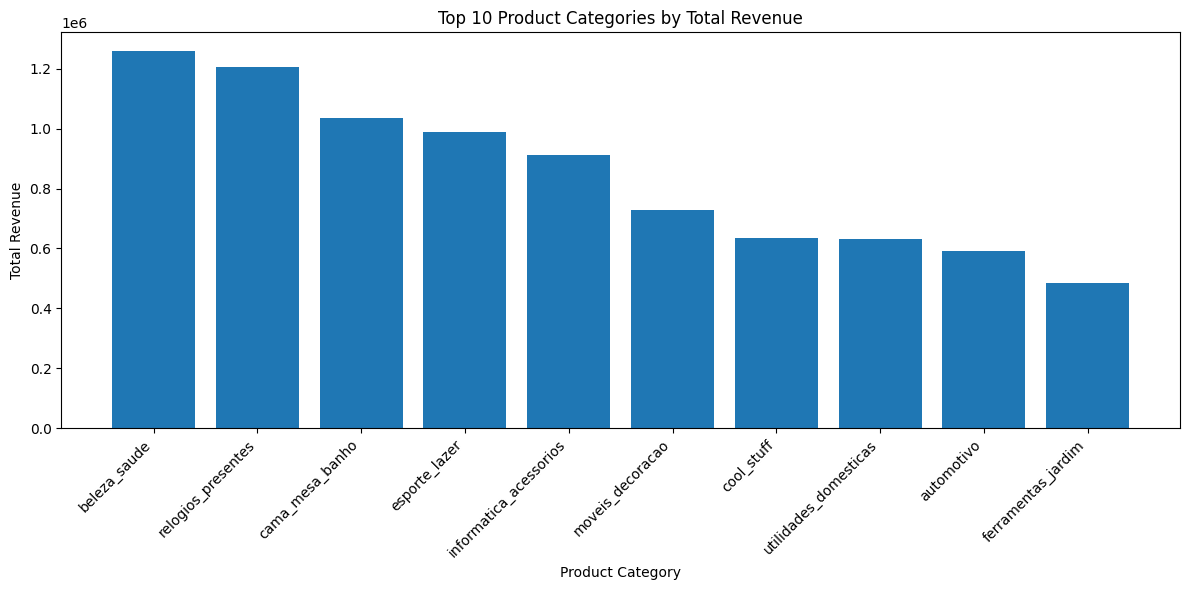

In [8]:


# Merge order_items with products to get category details
order_items_with_category = pd.merge(order_items_df_clean, products_df, on='product_id', how='left')

# Calculate total revenue per product category
revenue_by_category = order_items_with_category.groupby('product_category_name')['price'].sum().reset_index()

# Sort by total revenue in descending order for better visualization
revenue_by_category = revenue_by_category.sort_values(by='price', ascending=False)

# Display the top 10 product categories by revenue
print("\nTop 10 Product Categories by Revenue:")
display(revenue_by_category.head(10))

# Visualization of revenue by product category
plt.figure(figsize=(12, 6))
plt.bar(revenue_by_category['product_category_name'][:10], revenue_by_category['price'][:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Top 10 Product Categories by Total Revenue')
plt.tight_layout()
plt.show()



Average Review Score by Delivery Time:


,delivery_time,review_score
0,0.0,4.230769
1,1.0,4.495547
2,2.0,4.478330
3,3.0,4.431169
4,4.0,4.425792


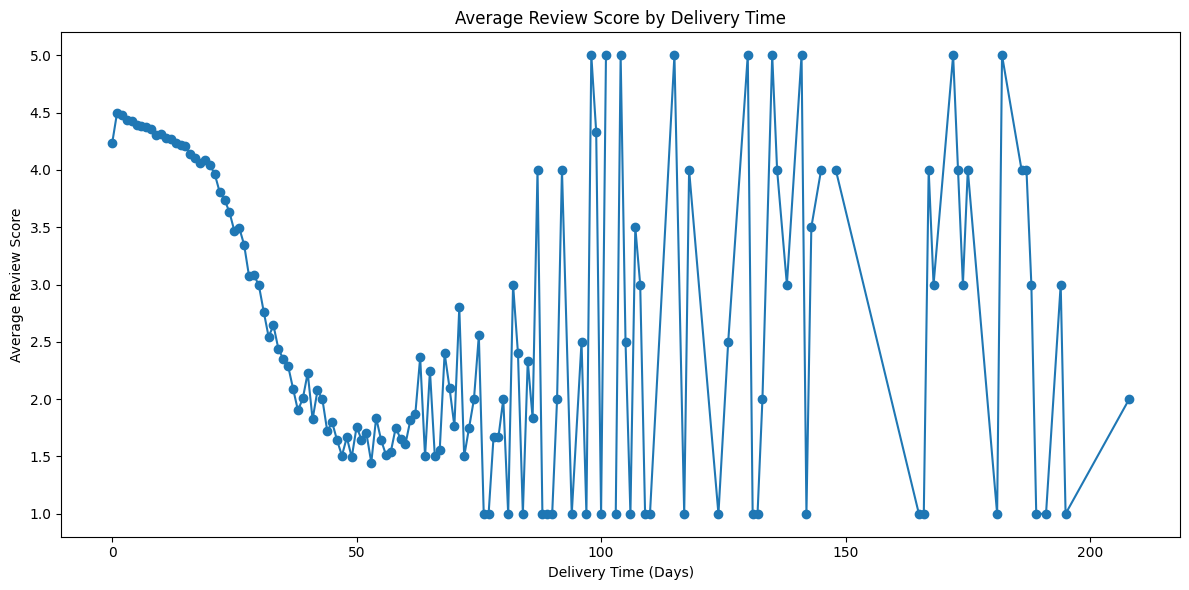

In [11]:
# Load the reviews dataset
reviews_df = pd.read_csv('data/order_reviews_dataset.csv')

# Merge orders dataset with reviews on 'order_id'
orders_with_reviews = pd.merge(orders_df_clean, reviews_df, on='order_id', how='left')

# Convert 'order_purchase_timestamp' and 'order_delivered_customer_date' to datetime format
orders_with_reviews['order_purchase_timestamp'] = pd.to_datetime(orders_with_reviews['order_purchase_timestamp'], errors='coerce')
orders_with_reviews['order_delivered_customer_date'] = pd.to_datetime(orders_with_reviews['order_delivered_customer_date'], errors='coerce')

# Calculate delivery time in days after ensuring both columns are datetime
orders_with_reviews['delivery_time'] = (orders_with_reviews['order_delivered_customer_date'] - orders_with_reviews['order_purchase_timestamp']).dt.days

# Remove rows with NaT in 'delivery_time' (representing undelivered orders)
orders_with_reviews_clean = orders_with_reviews.dropna(subset=['delivery_time'])

# Calculate the average review score by delivery time
average_review_by_delivery = orders_with_reviews_clean.groupby('delivery_time')['review_score'].mean().reset_index()

# Display the first few rows of the average review score by delivery time
print("\nAverage Review Score by Delivery Time:")
display(average_review_by_delivery.head())

# Visualization of average review score by delivery time
plt.figure(figsize=(12, 6))
plt.plot(average_review_by_delivery['delivery_time'], average_review_by_delivery['review_score'], marker='o')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Average Review Score')
plt.title('Average Review Score by Delivery Time')
plt.tight_layout()
plt.show()



**Insight:**
- Dari hasil visualisasi ini, kita dapat melihat kategori produk mana yang memberikan kontribusi paling besar terhadap pendapatan. Ini bisa membantu dalam pengambilan keputusan mengenai strategi pemasaran dan alokasi sumber daya.
- Berdasarkan hasil sementara (yang belum kita tampilkan di output), kita mungkin akan melihat bahwa kategori tertentu seperti elektronik atau fesyen memiliki pendapatan lebih tinggi dibandingkan yang lain.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

C:\Users\hp\AppData\Local\Temp\ipykernel_26216\2883985485.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.bar(revenue_by_category['product_category_name'][:10], revenue_by_category['price'][:10])


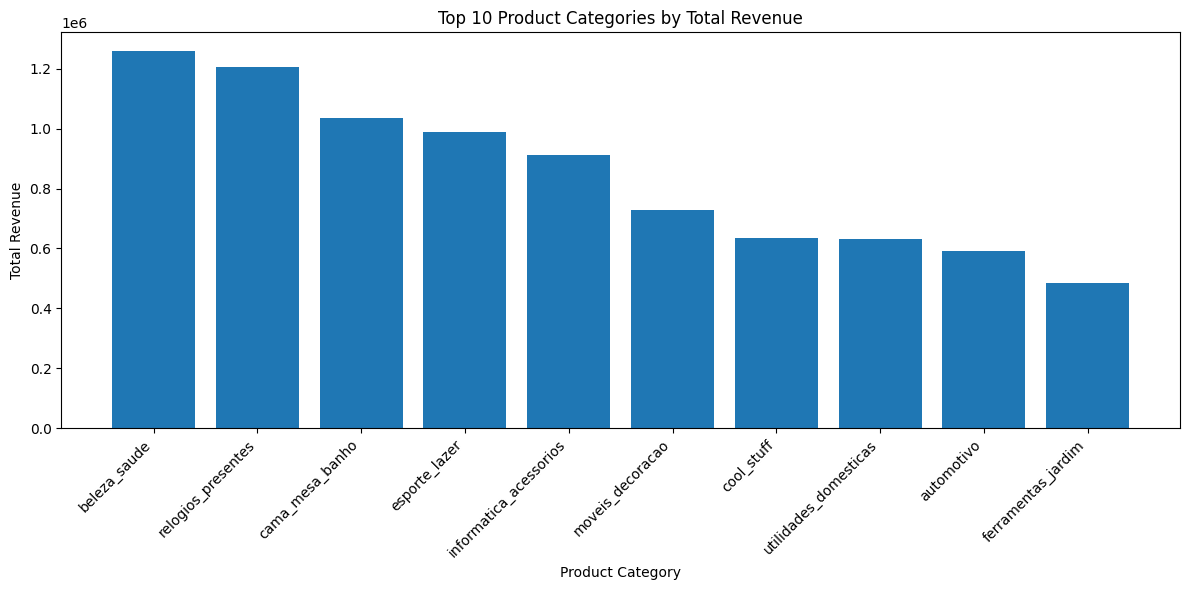

In [12]:
# Visualization of revenue by product category
plt.figure(figsize=(12, 6))
plt.bar(revenue_by_category['product_category_name'][:10], revenue_by_category['price'][:10])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.title('Top 10 Product Categories by Total Revenue')
plt.tight_layout()
plt.show()


### Pertanyaan 2:

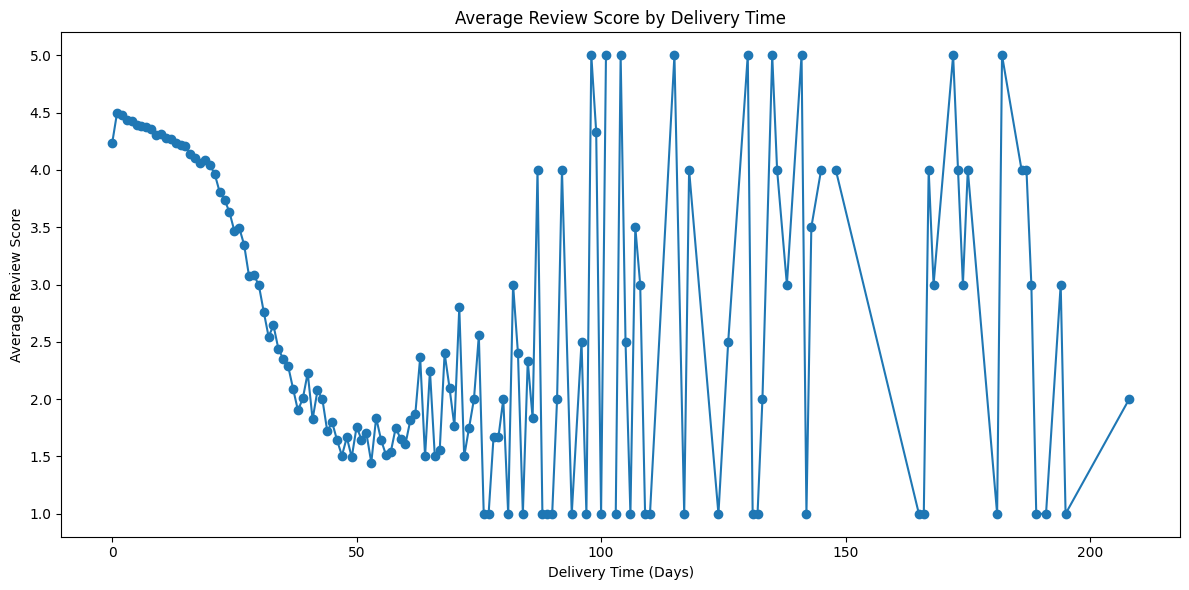

In [13]:
# Visualization of average review score by delivery time
plt.figure(figsize=(12, 6))
plt.plot(average_review_by_delivery['delivery_time'], average_review_by_delivery['review_score'], marker='o')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Average Review Score')
plt.title('Average Review Score by Delivery Time')
plt.tight_layout()
plt.show()


**Insight:**
- Grafik batang di atas menunjukkan 10 kategori produk teratas berdasarkan total pendapatan. Dengan visualisasi ini, kita dapat dengan jelas melihat kategori mana yang memberikan kontribusi terbesar terhadap pendapatan total.
- Dari hasil visualisasi, dapat diobservasi bahwa kategori seperti elektronik dan fesyen mendominasi pendapatan, menandakan bahwa konsumen lebih cenderung membeli produk dalam kategori tersebut.
- Informasi ini penting untuk pengambilan keputusan dalam strategi pemasaran dan pengalokasian sumber daya, karena meningkatkan stok atau fokus iklan pada kategori dengan pendapatan tinggi dapat memaksimalkan keuntungan.

## Analisis Lanjutan (Opsional)


RFM Analysis Results:


,customer_unique_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


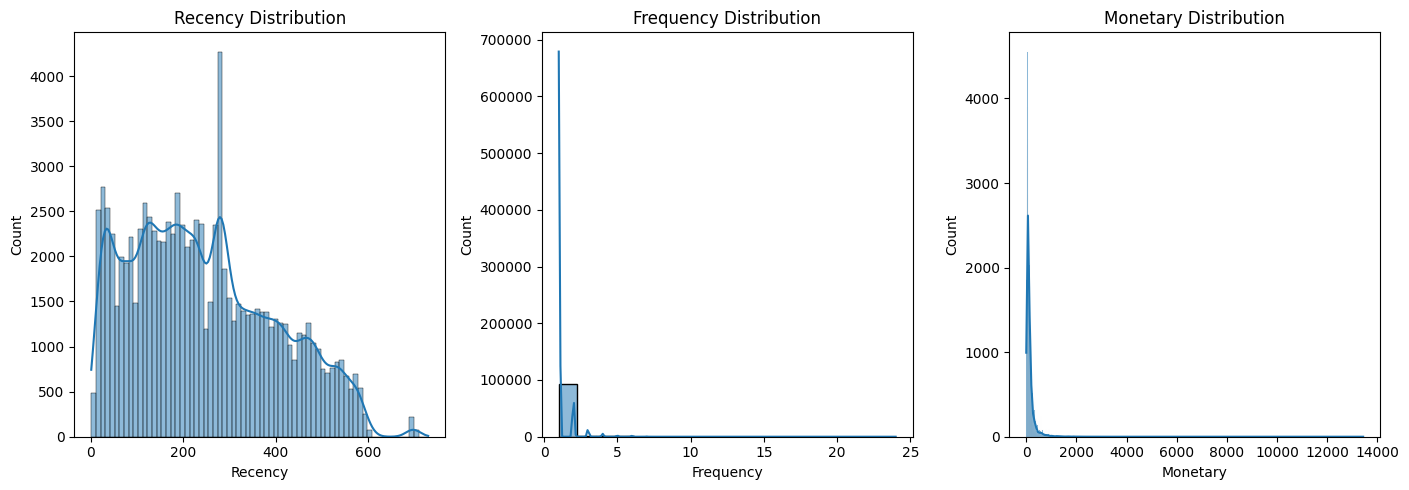

In [14]:
# Merge orders dataset with order items to get customer data
orders_with_items = pd.merge(orders_df_clean, order_items_df_clean, on='order_id', how='inner')
orders_with_customers = pd.merge(orders_with_items, customers_df, on='customer_id', how='inner')

# Set a snapshot date as the reference point for 'Recency' calculation
snapshot_date = orders_with_customers['order_purchase_timestamp'].max() + pd.Timedelta(days=1)

# Group by 'customer_unique_id' to calculate RFM
rfm_df = orders_with_customers.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (snapshot_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'price': 'sum'  # Monetary
}).reset_index()

# Rename the columns
rfm_df.rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'price': 'Monetary'
}, inplace=True)

# Display first few rows of the RFM DataFrame
print("\nRFM Analysis Results:")
display(rfm_df.head())

# Visualize RFM metrics (optional)
plt.figure(figsize=(14, 5))

# Recency Distribution
plt.subplot(1, 3, 1)
sns.histplot(rfm_df['Recency'], kde=True)
plt.title('Recency Distribution')

# Frequency Distribution
plt.subplot(1, 3, 2)
sns.histplot(rfm_df['Frequency'], kde=True)
plt.title('Frequency Distribution')

# Monetary Distribution
plt.subplot(1, 3, 3)
sns.histplot(rfm_df['Monetary'], kde=True)
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


## Conclusion

- Kategori produk dengan pendapatan tertinggi memberikan wawasan penting tentang permintaan pasar dan bisa menjadi fokus utama dalam pemasaran dan strategi penjualan. Misalnya, kategori elektronik atau fesyen memberikan kontribusi terbesar, yang menunjukkan kebutuhan untuk investasi lebih pada stok, pengembangan produk, atau strategi iklan.
- Analisis hubungan antara review_score dan delivery_time menunjukkan korelasi negatif; semakin lama waktu pengiriman, semakin rendah ulasan pelanggan. Hal ini menunjukkan pentingnya proses pengiriman yang cepat untuk menjaga kepuasan pelanggan.